# Teoría de errores en computación 
[Error a nivel local y global.](#Error_a_nivel_local)<br>
[Estabilidad algorítmica.](#Estabilidad_algoritmica)<br>
[Linealidad y no linealidad en el tiempo de computo.](Linealidad_y_no_linealidad)<br>
[Material complementario.](Material_complementario)<br>

## Error a nivel local y global
<a id='Error_a_nivel_local'></a>
Independiente del origen del error (ver [tipos de errores](Clases_5_Teoria_de_errores.ipynb/#Tipos_de_errores)), en computación el error se puede clasificar como local y global, el error local se refiere al error a cada paso de la iteración y se presenta por errores dados de las sumas/restas y multiplicaciones/divisiones, mientras el error global se refiere a la acumulación de errores a medida que se hacen las operaciones e iteraciones, aquí veremos como se calculan y como afectan la estabilidad de los algoritmos. Pero primero definamos que se entiende por error:

Sea $x$ una cantidad cualquiera y $x^*$ una aproximación, se define el *error absoluto* como $\epsilon=|x^*-x|$ y el *error relativo* como $\eta=\epsilon/|x|$, por lo que $x^*=x\pm\epsilon$, donde el signo $\pm$ se refiere a que la cantidad está limitada al intervalo $[x-\epsilon,x+\epsilon]$. 


### Error en sumas y restas
De la teoría de errores se sabe que si $x^*=x \pm \epsilon_x$ y $y^*=y \pm \epsilon_y$, el error en la suma es dado por,

$$x^*+y^*=(x + y) \pm(\epsilon_x + \epsilon_y)$$

En la substracción el error es más complicado (ver [cancelación sustractiva](Clases_5_Teoria_de_errores.ipynb#Error_de_cancelación_sustractiva)), pues si las cifras se parecen mucho hay perdida de significancia. Para ver mejor esto de la definición de error relativo sabemos que el error es proporcional a la cantidad verdadera es decir, $\epsilon_x=x\eta_x$, $\epsilon_y=y\eta_y,$ tal que $x^*=x(1\pm\eta_x)$, $y^*=y(1\pm\eta_y)$, entonces el error es,

$$
\begin{align}
x^*-y^*=\,&x(1\pm\eta_x)-y(1\pm\eta_y)\\
   =\,&(x-y)\pm(x\eta_x-y\eta_y)\\
   =\,&(x-y)\left(1\pm\frac{|x\eta_x-y\eta_y|}{|x-y|}\right)\\
   =\,&(x-y)\left(1\pm\eta_{xy}\right)
\end{align}
$$

el error relativo en este caso será,

$$
\epsilon_{rel}=\eta_{xy}=\frac{|x\eta_x-y\eta_y|}{|x-y|},
$$

lo que nos dice que si $x$ es muy parecido a $y$, entonces valores pequeños de $\eta_x$ y $\eta_y$ pueden producir grandes errores en el resultado final.

### Ejemplo: acumulación del error en la adición y la sustracción
La secuecia $x_{n+1}=(x_n-1)10$ con $x_0=10/9$, simbólicamente debe generar a cada paso el mismo valor $x_n=10/9$ para cada $n=1,2,...$ (verifique con lápiz), no obstante, el siguiente código númerico, muestra la pérdida de precisión a cada paso iterativo según el número de cifras significativas tomadas para aproximar $10/9\approx 1.111111...$, por ejemplo si te toma solo 10 dígitos significativos se pierde un dígito a cada iteración, casos como este no son fáciles de detectar, comparemos que pasa si usamos 5, 7, 10 o 16 cifras después del punto:  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# *** Pérdida gradual de significancia *** 

# Cambie esta variable y vea que pasa (compare resultados):
digitos = 10 #5, 7, 8, 10, 16 # número de dígitos después del punto.
x=np.round(10.0/9.0,digitos) # x = 1.111111111 ...
for i in range(30):
    print(i,x)
    x=(x-1.0)*10.0

0 1.1111111111
1 1.1111111110000005
2 1.1111111100000048
3 1.1111111000000484
4 1.1111110000004842
5 1.1111100000048424
6 1.111100000048424
7 1.111000000484239
8 1.1100000048423908
9 1.100000048423908
10 1.0000004842390808
11 4.84239080833504e-06
12 -9.999951576091917
13 -109.99951576091917
14 -1109.9951576091917
15 -11109.951576091917
16 -111109.51576091917
17 -1111105.1576091917
18 -11111061.576091917
19 -111110625.76091917
20 -1111106267.6091917
21 -11111062686.091917
22 -111110626870.91917
23 -1111106268719.1917
24 -11111062687201.916
25 -111110626872029.16
26 -1111106268720301.5
27 -1.1111062687203024e+16
28 -1.1111062687203024e+17
29 -1.1111062687203023e+18


### Error local en la multiplicación y la división
El error en este caso si $x^*=x + \epsilon_x$ y $y^*=y + \epsilon_y$ es dado según la teoría de errores por, 

$$x^*y^*=xy \pm (x\epsilon_y+y\epsilon_x),$$

otra vez en este caso es mejor considerar $x^*=x(1\pm\eta_x)$ y $y^*=y(1\pm\eta_y)$, lo cual da,

$$
\begin{align}
x^*y^*=\,&x(1\pm\eta_x)y(1\pm\eta_y)\\
      =\,&xy(1\pm\eta_x\pm\eta_y\pm\eta_x\eta_y)\\
      \approx\,&xy[1\pm(\eta_x+\eta_y)]
\end{align}    
$$

donde se asume que $\eta_x\eta_y$ es muy pequeño y se desprecia. El error en la división es similar pues $x/y$ se puede ver como el producto $x\times(1/y)$, ósea,
$$
\begin{align}
\frac{x^*}{y^*}=\,&\frac{x(1\pm\eta_x)}{y(1\pm\eta_y)}\\
               =\,&\frac{x}{y}(1\pm\eta_x)(1\pm\eta_y)^{-1}\\
         \approx\,&\frac{x}{y}(1\pm\eta_x)(1\mp\eta_y)\\
         \approx\,&\frac{x}{y}(1\pm\eta_x\mp\eta_y\pm\eta_x\eta_y)\\
         \approx\,&\frac{x}{y}[1\pm(\eta_x-\eta_y)].
\end{align}    
$$
Como se puede ver, aparentemente el error es más pequeño que en la multiplicación, además si $\eta_x$ y $\eta_y$ son iguales el error sería del orden de $\eta_x\eta_y$, que es el término despreciado, no obstante es mejor considerar los errores en valor absoluto, es decir que el error es igual al de la multiplicación.

### El error para una función 
Según la teoría de errores es dado por, 
$$f^*=f\pm\Delta_f,$$
donde,
$$\Delta_f=|f'(x)|\epsilon_x,$$

note que este es el cambio en la función entre $x$ y $x^*$ (para entender esto piense en derivadas y a $\Delta_f$ como del diferencial de la función).
Así por ejemplo consideremos $f(x)=x^2$, entonces el error en la función es,

$$\Delta_f=|2x|\epsilon_x.$$

Veamoslo de manera explícita,

$$
\begin{align}
f(x^*)=\,&(x\pm\epsilon_x)^2\\
        =\,& x^2\pm 2x\epsilon_x+\epsilon_x^2\\
        \approx\,& x^2\pm 2x\epsilon_x\\
        \approx\,&f(x)\pm\Delta_f,
\end{align} 
$$

donde el error coincide con lo expresado previamente, note que $\epsilon_x^2$ se desprecia pues es muy pequeño. 


## Estabilidad algorítmica
<a id='Estabilidad_algoritmica'></a>

La caracterización de un algoritmo según su estabilidad, se refiere a que a medida que se hacen iteraciones el error crece de una manera lenta o rápida, esto se conoce como estabilidad de las condiciones iniciales y está directamente relacionado al cálculo error global. Para entender mejor esto, apliquemos la definición de error a una función $f(x)$, sea $x$ los datos de entrada y $\epsilon$ el error en los datos de entrada, entonces decimos que el algoritmo es *numéricamente estable* si el error absoluto es,

$$x - (x + \epsilon) = \epsilon  \propto |f(x) - f(x + \epsilon)|$$

con error relativo,

$$\frac{x - (x + \epsilon)}{x}  \propto \left|\frac{f(x) - f(x + \epsilon)}{f(x)}\right|.$$

El algoritmo es *numéricamente inestable* si los errores,

$$x - (x + \epsilon) = \epsilon << |f(x) - f(x + \epsilon)|$$

$$\frac{x - (x + \epsilon)}{x} << \left|\frac{f(x) - f(x + \epsilon)}{f(x)}\right|$$

Hay dos tipos importantes de algoritmos según su estabilidad, *lineales* y *exponenciales*, miremos como se propaga el error con las iteraciones:


### Algoritmo con error  lineal 
Supongamos que se introduce un error $\epsilon_0$ en algún momento de los cálculos, entonces si el error 
después de $n$ pasos es, $\epsilon_n \approx Cn\epsilon_0$, el error es lineal,
si $\epsilon_n \approx C^n\epsilon_0$ entonces el error es exponencial. Por ejemplo,
considere el algoritmo dado por la iteración:

$$p(n) = 2p(n−1) − p(n−2),    n=2,3,⋯$$

que tiene solución dada por,

$$p(n)= A + Bn,$$

pues,

$$
\begin{eqnarray}
2p(n−1) − p(n−2) &=& 2(A + B(n − 1)) − (A + B(n − 2))\\
&=& A(2 − 1) + B(2n − 2 − n + 2)\\
&=& A + Bn\\
&=& p(n).
\end{eqnarray}
$$

Si se escoge  $p(0) = 1$ y $p(1) = 1/3$ entonces resolviendo da que $A = 1$ y $B = −2/3$.
Ahora si aproximamos, $\hat p(1)=0.33333$ da $B$ a $-0.66667$ (con $5$ cifras significativas) por lo que, 

$$ p(n) = 1 − \frac{2}{3}n,$$

y

$$\hat p(n) = 1.0000 − 0.66667n,$$

así el error crease de manera lineal con $n$,

$$\epsilon_n=|p(n) − \hat p(n)| = \left(0.66667 − \frac{2}{3}\right)n.$$

Mostremos que el error crece de forma lineal con las iteraciones,

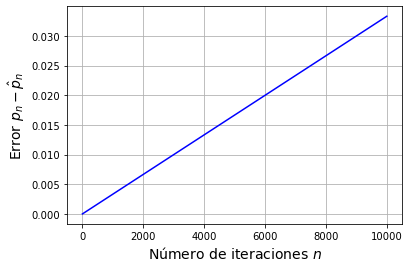

In [ ]:
# Número de iteraciones
Niter = 10000

# aproximación a 16 dígitos (64 bits)
A_d = 1.0
B_d = -2/3.
# aproximación a 7 dígitos (32 bits)
A_s =  1.00000
B_s = -0.66667

# función p(n): solución al n-th term
pn = lambda A, B, n: A + B*n

# Arrays para almacenar iteraciones
p_d = []
p_s = []
narray = range(Niter)
for n in narray:
    p_d.append( pn( A_d, B_d, n ) )
    p_s.append( pn( A_s, B_s, n ) )

#Convertir a numpy arrays
p_d = np.array(p_d)
p_s = np.array(p_s)

error = (p_d - p_s)# /p_d
plt.plot( narray, error, "-", color="blue" )
plt.xlabel("Número de iteraciones $n$", fontsize=14)
plt.ylabel("Error $p_n-\hat{p}_n$", fontsize=14)
plt.grid(True)
plt.show()

Ahora comparemos la propagación del error a la solución exacta mediante la fórmula de iteración:

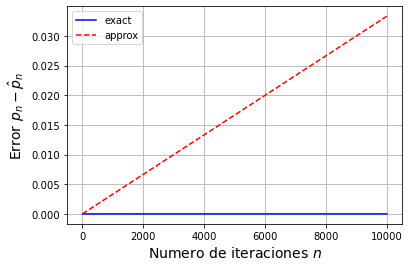

In [ ]:
# %pylab qt
N_iter = 10000 # Número de iteraciones

# precisión a 64 bits
A_d =  1
B_d = -2/3

#----------------------------------
pd = np.zeros(N_iter)
ps = np.zeros(N_iter)
pe = np.zeros(N_iter) 

pd[0]=pe[0]=1.0;  ps[0] = 1
pd[1]=pe[1]=1/3;  ps[1] = 0.33333

for n in range(2,N_iter):
    pd[n] = 2*pd[n-1] - pd[n-2]
    ps[n] = 2*ps[n-1] - ps[n-2]
    pe[n] = A_d + B_d*n
#----------------------------------

error_d = abs(pd - pe) # double 64 bits
error_s = abs(ps - pe) # 5 sifras significativas
narray  = np.arange(N_iter)

plt.plot( narray, error_d, "-", color="blue",label='exact')
plt.plot( narray, error_s, "--", color="red",label='approx' )
plt.legend()
plt.xlabel("Numero de iteraciones $n$", fontsize=14)
plt.ylabel("Error $p_n-\hat{p}_n$", fontsize=14)

plt.grid(True) 
plt.show()


Si comparamos la gráfica a la anterior vemos que son iguales. Caver recalcar que exacto aquí se refiere a usar una aproximación de 64 bits, ósea unas 16 cifras significativas: $-2/3\approx -0.6666666666666667$.

### Algoritmo con error  exponencial 
Considere el algoritmo producido por la siguiente iteración:

$$p(n)=\frac{10}{3}p(n−1)−p(n−2), \quad   n=2,3,⋯$$

en este caso se puede demostrar que la solución exacta al paso $n$ está dada por,

$$p(n)=A\left(\frac{1}{3}\right)^n + B3^n,$$

para cualquiera $A$ y $B$, que se pueden calcular a partir de las condiciones iniciales, así si escogemos $p(0)=1$ y $p(1)=1/3$ entonces $A=1$ and $B=0$, luego,

$$ p(n) = 1\left(\frac{1}{3}\right)^n,$$

pero si aproximamos $1/3$ por $0.33333$, da que $\hat A = 1.0000$ y $\hat B = −0.12500 \times 10^{−5}$, así,

$$ \hat p(n) = 1.0000 \left(\frac{1}{3}\right)^n − 0.12500 \times 10^{−5}(3)^n,$$

y error es,

$$\epsilon_n=|p(n) − \hat p(n)|= 0.12500 \times 10^{−5}(3^n),$$

Que muestra un crecimiento exponencial respecto a $n$. Ahora veamos como el error crece de forma exponencial con las iteraciones:

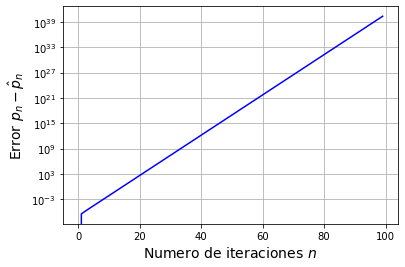

In [ ]:
%matplotlib inline
#Número de iteraciones
N = 100

A_d = 1.0
B_d = 0.

# función p(n): solución al n-th term
pn = lambda A, B, n: A*(1.0/3.0)**n + B*(3.0)**n

# Arrays para almacenamiento de iteraciones
p_s = [1.000000,0.333333]
p_d = [1.,1/3.]

narray = range(N)
for n in narray[2:]:
    p_s.append( 10/3.*p_s[n-1]-p_s[n-2] )
    p_d.append( pn( A_d, B_d, n ) )

#Convertir a array numpy
p_d = np.array(p_d)
p_s = np.array(p_s)

# otra forma más compacta pero mas difícil de leer
#p_d = np.append([1.000000,0.333333], np.array([A_d*(3.0)**-n + B_d*(3.0)**n for n in narray[2:]]))
#p_s = np.append([1.,1/3.]          , np.array([10/3.*p_s[n-1]-p_s[n-2]      for n in narray[2:]]))

error = p_d - p_s
plt.semilogy( narray, error, "-", color="blue" )
plt.xlabel("Numero de iteraciones $n$", fontsize=14)
plt.ylabel("Error $p_n-\hat{p}_n$", fontsize=14)
plt.grid(True)
plt.show()

Ahora comparemos como evoluciona el error si se usa la fórmula iterada y comparamos a la solución exacta a cada paso $n$:

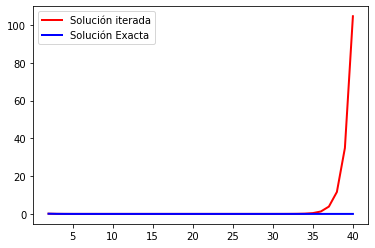

In [ ]:
# Propagación del error exponencial para la ecuación:
#   p(n)=10/3p(n−1)−p(n−2),    n=2,3,⋯
# Con solución analítica:
#   p(n) = A(1/3)^n + B3^n (A = 1 y B = 0, para p(0) =1 y p(1) = 1/3)

M = 40

# ----- Solución por iteración: --------
SI = []
p0=1; p1=1/3
for n in range(2,M+1):
    p2 = 10/3.*p1 - p0 # formula iterativa
    p0 = p1
    p1 = p2
    SI.append(p2) 

# ------ Solución Analítica ------------
SE = [(1/3)**n for n in range(2,M+1)]    
n  = np.arange(2,M+1)

plt.plot(n,SI, color="red", linewidth=2, label="Solución iterada" )
plt.plot(n,SE, color="blue", linewidth=2, label="Solución Exacta" )
plt.legend()
plt.show()

Como vemos el problema aún persiste pues $1/3 \approx 0.3333333333333333$ en 64 bits, osea sigue siendo una aproximación.

## Error global debido a acumulación de errores aleatorios
En muchos casos el error global total después de $N$ pasos no es sistemático y es de origen aleatorio, en este caso se puede demostrar por analogía al movimiento browniano (se verá luego al final del curso) que el error relativo es,

$$\epsilon_{re}=\sqrt{N}\epsilon_m$$
 
donde $\epsilon_m$ es el error de la maquina. Así por ejemplo, se puede afirmar que el error total en un proceso de convergencia será,

$$\epsilon_{total}=\epsilon_{tr}+\sqrt{N}\epsilon_m,$$

donde $\epsilon_{tr}$ es el error de truncación después de $N$ pasos.

In [ ]:
# ejemplo/tarea

## Linealidad y no linealidad en el tiempo de computo
<a id='Linealidad_y_no_linealidad'></a>
Un algoritmo también se dice que es lineal respecto al tiempo de computo.
La siguiente rutina es lineal, pues el número de pasos es proporcional al tiempo. En este ejemplo se evalúa el tiempo requerido para evaluar la suma de $N$ números aleatorios como función de cuantos números son adicionados:
la suma es evaluada de dos maneras, la primera por implementación de un bucle `for` y en la segunda se usa `numpy`:

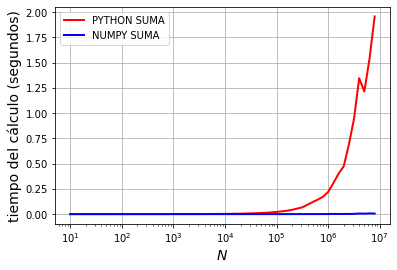

In [ ]:
# descomentar y estudiar la linearidad en el gráfico mediante el zoom.
# %pylab
import time as tm                # librería para medir tiempos 

nmax = 10**np.arange(1,7,0.1)    # Máximo número of iteraciones

t_for = []                       # Guardar tiempos for python
t_np = []                        # Guardar tiempos numpy Python
for n in nmax:
    N = np.random.random(int(n)) # Genera array de n elementos aleatorios 

    # **** Suma con for ****
    ti = tm.perf_counter()       # Medir tiempo inicial
    suma = 0
    for i in range(int(n)):
        suma += N[i]
    tf = tm.perf_counter()       # Medir tiempo final
    t_for.append(tf-ti)          # Almacenar tiempo del cómputo
    
    # **** Suma con numpy ****
    ti = tm.perf_counter()       # Medir tiempo inicial
    suma = np.sum(N)
    tf = tm.perf_counter()       # Medir tiempo final
    t_np.append(tf-ti)           # Almacenar tiempo del cómputo

# probar plt.plot para ver la linearidad    
plt.semilogx( nmax, t_for, "-", color="red", linewidth=2, label="PYTHON SUMA" )
plt.semilogx( nmax, t_np, "-", color="blue", linewidth=2, label="NUMPY SUMA" )
plt.xlabel("$N$", fontsize=14)
plt.ylabel("tiempo del cálculo (segundos)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

En el anterior gráfico ¿son lineales o no lineales los tiempos respecto a N? sí son lineales (note que el grafico es similogaritmico en $x$, para ver esto regraficar con `plt.plot`).

En algunos problemas el tiempo no es lineal respecto del número de iteraciones, por ejemplo, en el problema de los $N$ cuerpos con interacción gravitacional el cálculo de fuerza toma un tiempo de $N^2$ (ver [tarea](#computo_N_cuerpos)), pues hay que calcular la interacción entre cada par de partículas, es decir, hay que hacer dos bucles `for` para el computo, ósea para la partícula uno se calcula las distancias $r_{1,2}, r_{1,3},...,r_{1,N}$, luego se repite esto para la partícula dos y así hasta terminar, este es el segundo bucle. 
Se puede demostrar que por medio de otros algoritmos el tiempo se puede reducir a $N$log$N$), veamos la diferencia entre estos dos tiempos:

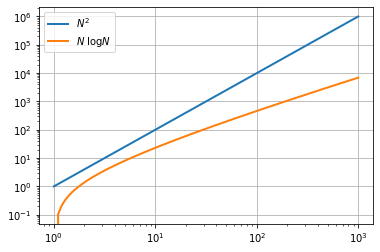

In [ ]:
N = np.arange(1,1e3,0.1)
plt.loglog( N, N**2, lw=2, label="$N^2$" ) # lw=linewidth es ancho de linea.
plt.loglog( N, N*np.log(N), lw=2, label="$N\ \log N$" )
plt.legend( loc="upper left" )
plt.grid(True)
plt.show()

## Material complementario
<a id='Material_complementario'></a>
En el primer ejemplo usamos, $p(n)= A + Bn$, como solución a la serie generada por $p(n) = 2p(n−1)−p(n−2), n=2, 3$ (define una secuencia recursiva es decir, cada término de la secuencia es definido como una función de términos anteriores), implementemos esta serie usando esta última ecuación:

In [ ]:
# Solucionar la ecuación siguiente 
# p(n) = 2p(n−1)−p(n−2), n=2, 3,..., 10  con p(0)=1, p(1)=1/3
# a) de manera recursiva: 
def p(n):
    if n == 0: return 1
    if n == 1: return 1/3
    P = 2*p(n-1) - p(n-2)
    #print (n,P)
    return P

print ('Manera recursiva',p(10)) # da -5.666666666666664


# De manera iterativa:
p0=1; p1=1/3
for n in range(2,11):
    p2 = 2*p1 - p0
    p0 = p1
    p1 = p2
    #print (n,P)
    
print ('Manera iterativa',p2) 

Manera recursiva -5.666666666666664
Manera iterativa -5.666666666666664


## Ejercicios 
**Tarea**: Considere la función $f(x) =x\left(\sqrt{x+ 1}−\sqrt{x}\right)$, que para una secuencia de potencias de 10 da los resultados:
```c
      x   f(x) computado  f(x) verdadero
      1     0.414210         0.414214
     10     1.54340          1.54347
    100     4.99000          4.98756
   1000    15.8000          15.8074
 10,000    50.0000          49.9988
100,000   100.000          158.113
```
explique de manera númerica los resultados y la perdida significativa de dígitos (pista: debe analizar término a término).

**Tarea**: Considere la función $(1 - \cos x)/\hbox{sen}\,x$ con $x \approx 0$, es decir  considere la operación,
```python
x=1e-2
(1-np.round(cos(x),4))/np.round(sin(x),4) # da 0.0
```
la repuesta debería ser aproximadamente 0.005. Proponga un método alternativo para corregir este problema.


**Tarea**: Considere las funciones,

$$f(x)=\frac{1-\cos^2(x)}{x^2},\\
  g(x)= \frac{\hbox{sen}^2\,(x)}{x^2},
$$

que matemáticamente son equivalentes por la identidad trigonométrica $\hbox{sen}^2\,(x)+\cos^2(x)=1$.

a) Según el resultado analítico $f(0)=g(0)=1$, pero si se usa `x = 1e-5` el resultado numérico a 32 bits es:
```python
x=np.float32(1e-5)
f(x),g(x) # da (0.0, 1.0)
```
explique por que se da este error con $f(x)$ y no con $g(x)$ a 32 bits, ¿qué pasa a 64 bits? (pista calcule cuánto vale $\cos(x)$ y luego su cuadrado, compare, ¿qué efecto tiene el signo menos?).

b) Graficar ambas funciones en el intervalo $[-1,1]$ con 100 valores y con precisión a 32 bits y luego a 64 bits, 
```python
x=np.linspace(-0.1,0.1,100, dtype=float32) 
```
muestre que los resultados son catastróficos para el segundo gráfico. Explicar por qué se da este resultado.

**Tarea**: el número euler se define por el límite, 
$e=\lim_{n\rightarrow\infty}(1 + 1/n)^n$,
use esta esta fórmula para aproximar $e$ para valores de $n=1,...,20.$ Grafique el error y explique por que falla esta fórmula a medida que $n$ crece, ¿el error es exponencial o lineal?

**Tarea**: la serie de Fibonacci tiene importantes aplicaciones en física, por ejemplo, los dominios en superconductores son controlados por números de Fibonacci; en biología describe la cantidad de pétalos de las margaritas, cómo aumenta la densidad de las ramas en el tronco de un árbol y cómo se disponen las escamas de la piña; además en astronomía se usa en la descripción de estrellas pulsares, galaxias espirales y la formación de agujeros negros. La manera iterativa de la secuencia de Fibonacci se define por,

$$f_{n}=f_{{n-1}}+f_{{n-2}},$$

con condición inicial $f_{0}=0$ y $f_{1}=1$. 

a) Hacer un programa que calcule y grafique hasta $n=100$ la secuencia.

b) La sucesión de Fibonacci tiene la forma funcional,

$$
f_{n}=\frac{1}{\sqrt{5}}\left[\left({\frac {1+{\sqrt 5}}2}\right)^{n}-\left({\frac {1-{\sqrt 5}}2}\right)^{n}\right].
$$

Calcule el error entre esta función y la forma iterada. ¿Cuál resultado es más preciso? explique por qué.

c) La *proporción áurea* (golden ratio) se define por la secuencia $x_n=f_{n+1}/f_n$ y converge a $(1+\sqrt{5})/2$, escriba un programa y calcule este número con una precisión deseada.

e) La [espiral de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci#/media/Archivo:Fibonacci_spiral_34.svg) se genera al dibujar arcos circulares que conectan las esquinas opuestas de los cuadrados ajustados a los valores de la sucesión; adosando sucesivamente cuadrados de lado 0, 1, 1, 2, 3, 5, 8, 13, 21 y 34, graficar esta espiral.

**Tarea**: Las [funciones de bessel esféricas](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_Bessel#Funciones_esf%C3%A9ricas_de_Bessel:_%7F'%22%60UNIQ--postMath-0000006A-QINU%60%22'%7F) $j_l(x)$ y $y_l(x)$  (a esta última se conoce como función esférica de Neumann y está relacionada a la primera por $y_{l}(x)=(-1)^{l+1}j_{-1-l}(x)$) aparecen en muchos problemas de física, tales como ondas electromagnéticas, óptica, conducción del calor en objetos cilíndricos, modos de vibración de una membrana delgada circular, mecánica cuántica, etc; se pueden calcular a partir de las relaciones de recurencia,

$$
j_{l+1}(x)=\frac{2l+1}{x}j_{l}(x)-j_{l-1}(x), \quad\hbox{(up),}\\
j_{l-1}(x)=\frac{2l+1}{x}j_{l}(x)-j_{l+1}(x), \quad\hbox{(down),}
$$

donde los primeros dos términos son, 

$$
j_{0}(x)={\frac {\sin x}{x}},\quad  j_{1}(x)={\frac {\sin x}{x^{2}}}-{\frac {\cos x}{x}},\\
y_{0}(x)=-j_{-1}(x)=-\,{\frac {\cos x}{x}},\quad y_{1}(x)=j_{-2}(x)=-\,{\frac {\cos x}{x^{2}}}-{\frac {\sin x}{x}}.
$$

a) Escribir un programa que muestre que (up) produce un error catastrófico que crece como $N!$ (número de pasos en el `for`)  pero que este error se corrige si se usa (down), calcule hasta $l=25$ para $x = 0.1, 1.0, 10.$ <br>
b) Grafique la convergencia y la estabilidad de los resultados (use un error relativo de (1.0e-10)). Ayuda, use:
```python
def J_down(x,n,m) : # Método down 
    j=np.zeros(start+2)
    j[m+1] = j[m] = 1 
    for k in range(m,0,-1):
        j[k-1] = (2.*k+1.)/x*j[k]-j[k+1]
        scale = (np.sin(x)/x)/j[0] # escalar solución a j[0]
    return j[n]*scale
```
Ver landau, sección 2.2.

<a id='computo_N_cuerpos'></a>
**Tarea**: Considere un sistema con $N=2,...,20$ planetas que interactúan mediante la ley de gravitación universal, hacer un programa calcule las energías de interacción entre cada par de planetas. a) Verificar que el tiempo de computo es proporcional a, $t\sim N^2$, b) demuestre que al implementar los bucles el tiempo de cómputo se puede reducir a aproximadamente la mitad, $t\sim (N^2-N)/2$, si se tiene en cuenta la simetría, $ r_{ij}=r_{ji}$ (pista, escriba explícitamente la matriz con los $r_{ij}$ para ver las simetrías). c) Escriba el código que implemente el numeral b).


## Biblografia
Burden

https://es.wikipedia.org/wiki/Estabilidad_num%C3%A9rica

https://www.cl.cam.ac.uk/teaching/1819/NumAnalys/Numerical_Analysis_2019.pdf

http://www.math.pitt.edu/~trenchea/math1070/MATH1070_2_Error_and_Computer_Arithmetic.pdf